### Student Information
Name: Fatima Lois E. Suarez

Student ID: NCCU 110761503

GitHub ID: flesuarez19

---

### Instructions

1. First: do the **take home** exercises in Part 1 of the [SNHC7450-Lab2-master Repo](https://github.com/fhcalderon87/SNHC7450_Lab2_master/blob/main/SNHC4750_Lab2_master.ipynb). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [SNHC7450-Lab2-master Repo](https://github.com/fhcalderon87/SNHC7450_Lab2_master/blob/main/SNHC4750_Lab2_master.ipynb) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 40% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and/or textbooks for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generat a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


Create a new repository on Github and upload your homework to it. Submit a link to the repository to my email __BEFORE the deadline (Dec. 27th 11:59 pm, Monday)__. 

---

## Part 1

In [1]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [2]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [3]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [4]:
# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

#### Exercise 1
Try to fetch records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [5]:
comp_graphics = X.loc[(X["category_name"]  == "comp.graphics")]
comp_graphics[::10][0:5]

text  category  \
0    From: sd345@city.ac.uk (Michael Collier) Subje...         1   
43   From: zyeh@caspian.usc.edu (zhenghao yeh) Subj...         1   
76   From: sts@mfltd.co.uk (Steve Sherwood (x5543))...         1   
107  From: samson@prlhp1.prl.philips.co.uk (Mark Sa...         1   
172  From: thinman@netcom.com (Technically Sweet) S...         1   

     category_name  
0    comp.graphics  
43   comp.graphics  
76   comp.graphics  
107  comp.graphics  
172  comp.graphics

---

#### Exercise 2
Please check the data and the process below, describe what you observe and why it happened.
Hint: why .isnull() didn't work?

In [6]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

0. `np.nan` is an object (the `NaN` value itself) and the `NaN`value itself is read by `.isnull()` as an empty field
1. no entry at all, and so is also ready by `.isnull()` as an empty field
2. `"NaN"` is the actual string and so is read not as the value/object `NaN` but as a string
3. `"None"` is the actual string and so is read not as the value/object `None` but as a string
4. `None` is an object used to define a null value or no value at all, and so is read by `.isnull()` as an empty field
5. `""` defines an empty set but is also not a null set in terms of data type and so is not treated as a null set

---

#### Exercise 3
We can also do a side-by-side comparison of the distribution between the two datasets.

In [7]:
#Step 1: get test set

twenty_train_test = fetch_20newsgroups(subset='test', categories=categories, \
                                  shuffle=True, random_state=42)


# construct dataframe from a list
X_test = pd.DataFrame.from_records(dmh.format_rows(twenty_train_test), columns= ['text'])

In [8]:
X_test['category'] = twenty_train_test.target
X_test['category_name'] = X_test.category.apply(lambda t: dmh.format_labels(t, twenty_train_test))

<AxesSubplot:title={'center':'training data category distribution'}>

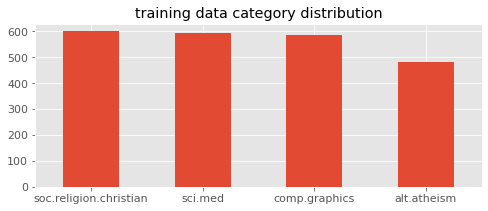

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

# plot barchart for X_train
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'training data category distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

soc.religion.christian    398
sci.med                   396
comp.graphics             389
alt.atheism               319
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'testing data category distribution'}>

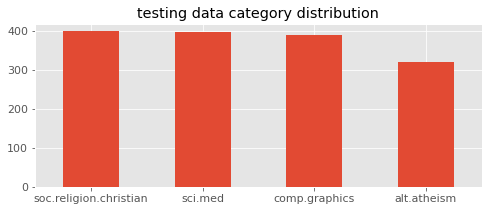

In [10]:
print(X_test.category_name.value_counts())

# plot barchart for X_sample
X_test.category_name.value_counts().plot(kind = 'bar',
                                    title = 'testing data category distribution',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [11]:
# create dataframe for graphing
train_dist = X.category_name.value_counts()
test_dist = X_test.category_name.value_counts()
categories = X.category_name.unique()

df_bars = pd.DataFrame([train_dist, test_dist], index = ['train set', 'test set'])

# view data
print(df_bars)

           soc.religion.christian  sci.med  comp.graphics  alt.atheism
train set                     599      594            584          480
test set                      398      396            389          319


<AxesSubplot:>

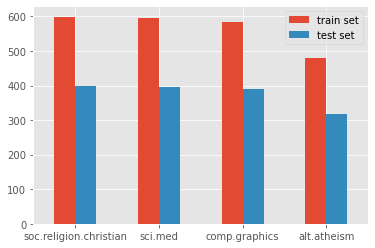

In [12]:
#plot multibargraph
df_bars.transpose().plot.bar(rot=0)

---

In [13]:
import nltk

In [14]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [16]:
analyze = count_vect.build_analyzer()

#### Exercise 4

Let's analyze the first record of our X dataframe with the new analyzer we have just built.

In [17]:
record = X.loc[0].text
record

'From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. '

In [18]:
analyze(record)

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

#### Exercise 5
You can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization.

#### Attempt: 

- shuffle documents to hoping to find a spot in the frequency matrix with more non-zero entries
- skip to non-numerical terms (far away from the 0th index) since there's a higher chance of occurence for words

In [19]:
X_shuffled = X.sample(frac=1)

In [20]:
X_shuffled

text  category  \
1695  From: brentb@tamsun.tamu.edu (Brent) Subject: ...         1   
1035  From: rgc3679@bcstec.ca.boeing.com (Robert G. ...         1   
2122  From: Steve_Mullins@vos.stratus.com Subject: R...         0   
971   From: mathew <mathew@mantis.co.uk> Subject: Al...         0   
215   From: XOPR131@maccvm.corp.mot.com (Gerald McPh...         3   
...                                                 ...       ...   
2240  From: balick@nynexst.com (Daphne Balick) Subje...         2   
1216  From: neideck@nestvx.enet.dec.com (Burkhard Ne...         1   
1302  From: mogal@deadhead.asd.sgi.com (Joshua Mogal...         1   
1735  From: "james kewageshig" <james.kewageshig@can...         1   
1874  Subject: Re: Video in/out From: djlewis@ualr.e...         1   

               category_name  \
1695           comp.graphics   
1035           comp.graphics   
2122             alt.atheism   
971              alt.atheism   
215   soc.religion.christian   
...                      ...   
2240                 sci.med   
1216           comp.graphics   
1302           comp.graphics   
1735           comp.graphics   
1874           comp.graphics   

                                               unigrams  
1695  [From, :, brentb, @, tamsun.tamu.edu, (, Brent...  
1035  [From, :, rgc3679, @, bcstec.ca.boeing.com, (,...  
2122  [From, :, Steve_Mullins, @, vos.stratus.com, S...  
971   [From, :, mathew, <, mathew, @, mantis.co.uk, ...  
215   [From, :, XOPR131, @, maccvm.corp.mot.com, (, ...  
...                                                 ...  
2240  [From, :, balick, @, nynexst.com, (, Daphne, B...  
1216  [From, :, neideck, @, nestvx.enet.dec.com, (, ...  
1302  [From, :, mogal, @, deadhead.asd.sgi.com, (, J...  
1735  [From, :, ``, james, kewageshig, '', <, james....  
1874  [Subject, :, Re, :, Video, in/out, From, :, dj...  

[2257 rows x 4 columns]

In [21]:
X_shuffled_counts = count_vect.fit_transform(X_shuffled.text)

In [22]:
plot_x_shuffled = ["term_"+str(i) for i in count_vect.get_feature_names()[10000:30000:50]]
plot_y_shuffled = ["doc_"+ str(i) for i in list(X_shuffled.index)[0:1000:20]]
plot_z_shuffled = X_shuffled_counts[0:1000:20, 10000:30000:50].toarray()

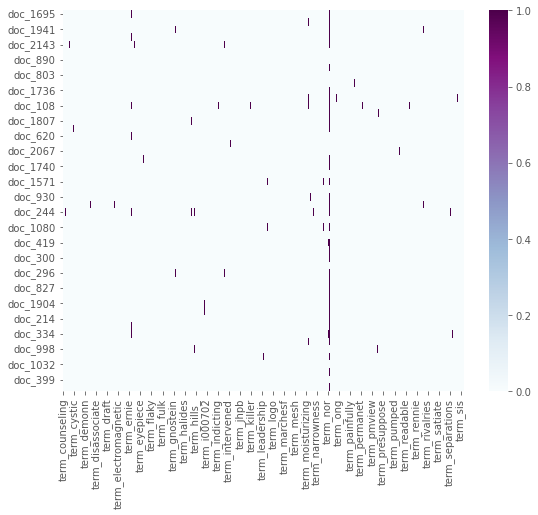

In [23]:
import seaborn as sns

df_shuffled = pd.DataFrame(plot_z_shuffled, columns = plot_x_shuffled, index = plot_y_shuffled)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_shuffled,
                 cmap="BuPu",
                 vmin=0, vmax=1, annot=False)

---

#### Exercise 6
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [24]:
from sklearn.decomposition import PCA

X_reduced_3D = PCA(n_components = 3).fit_transform(X_counts.toarray())

<IPython.core.display.Javascript object>


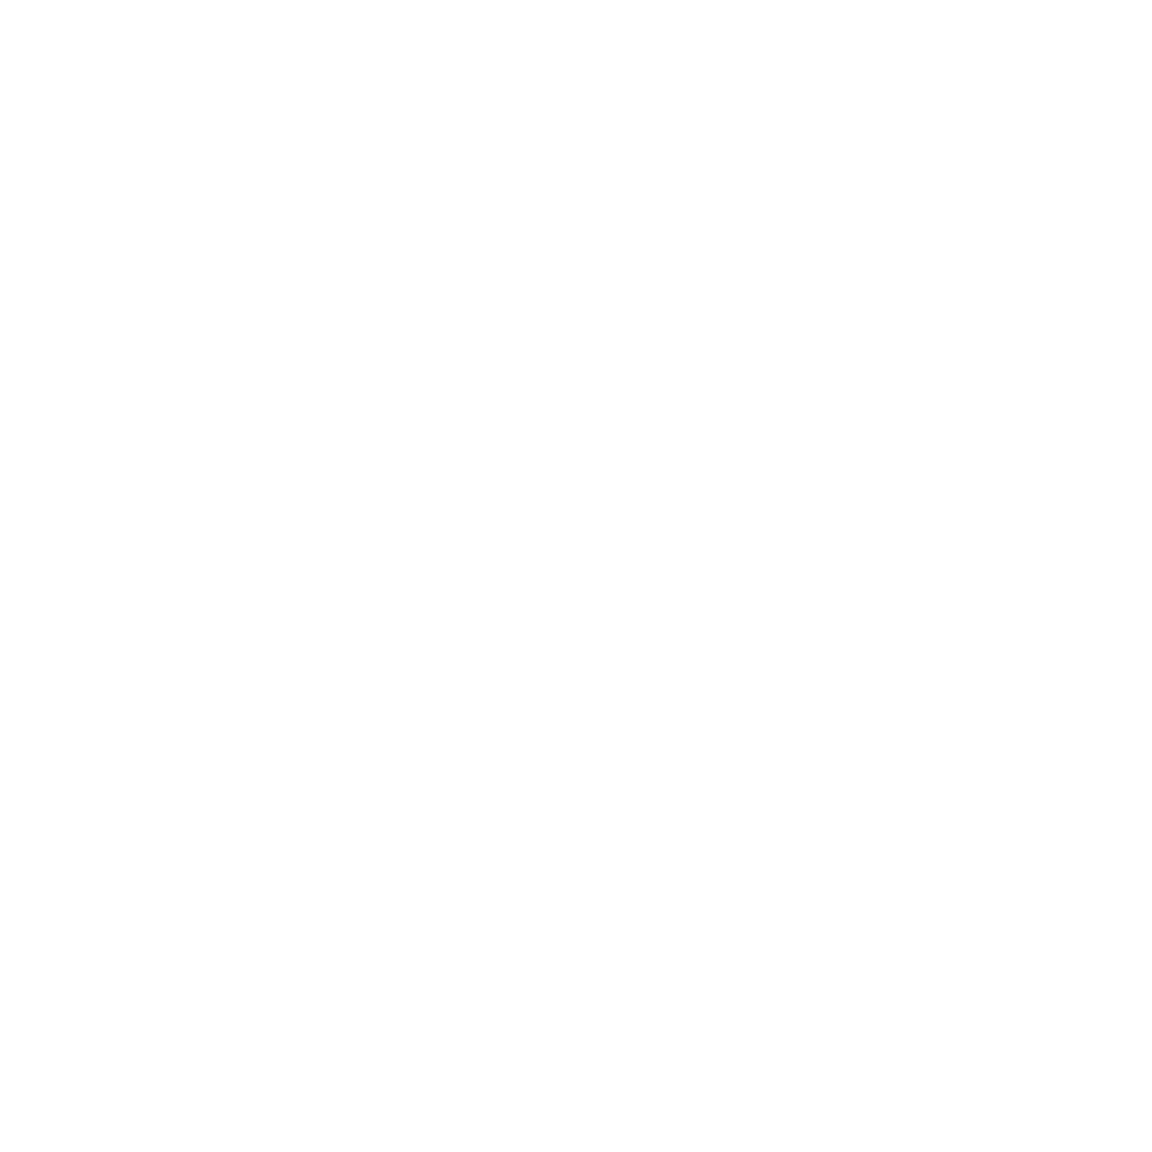

In [25]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs_3D = X_reduced_3D[X['category_name'] == category].T[0]
    ys_3D = X_reduced_3D[X['category_name'] == category].T[1]
    zs_3D = X_reduced_3D[X['category_name'] == category].T[2]
   
    ax.scatter(xs_3D, ys_3D, zs_3D, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

---

In [26]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [27]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

term_frequencies

array([134,  92,   1, ...,   1,   1,   1])

<IPython.core.display.Javascript object>


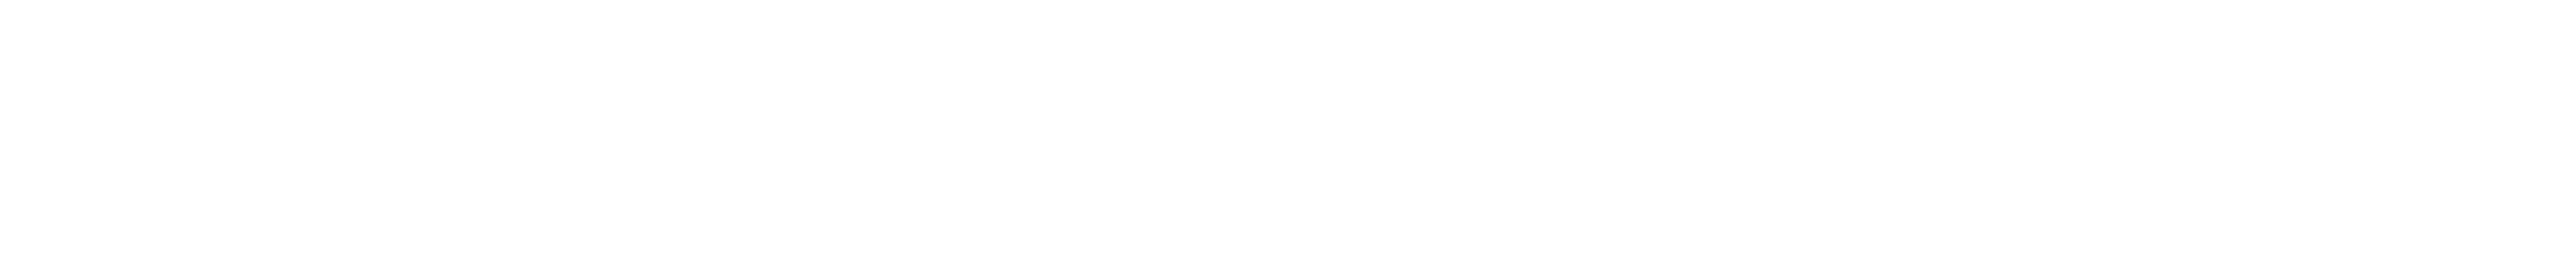

In [28]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

#### Exercise 6 also?
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize using plotly.

In [29]:
### NO ANSWER

#### Exercise 7
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses).

In [30]:
import numpy as np

xs_temp = count_vect.get_feature_names()
ys = term_frequencies

xs = np.array(xs_temp)

In [31]:
df_temp = pd.DataFrame([xs, ys])

In [32]:
df = df_temp.transpose()

In [33]:
df.columns = ['term', 'frequency']

In [34]:
df

term frequency
0                00       134
1               000        92
2              0000         1
3        0000001200         2
4      000005102000         1
...             ...       ...
35783         zyxel         2
35784            zz         1
35785           zzz         1
35786            ªl         1
35787      íålittin         1

[35788 rows x 2 columns]

In [35]:
final_df = df.sort_values(by=['frequency'], ascending=False)

<IPython.core.display.Javascript object>


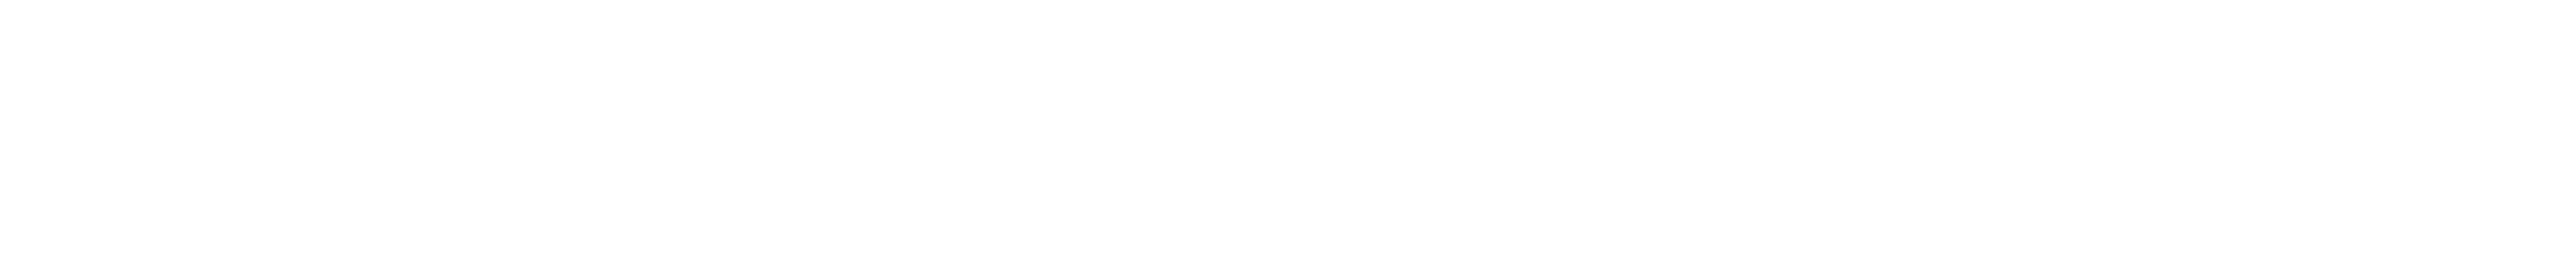

In [36]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=final_df['term'][0:300], 
            y=final_df['frequency'][0:300])
g.set_xticklabels(final_df['term'][0:300], rotation = 90);

-----

## Part 2

##### Loading the dataset:

In [37]:
import numpy as np
import pandas as pd

yelp_data = pd.read_csv('yelp_labelled.txt', sep="\t+", names = ['sentence','score'], header=None,engine='python')
amazon_data = pd.read_csv('amazon_cells_labelled.txt', sep="\t+", names = ['sentence','score'], header=None,engine='python')
imdb_data = pd.read_csv('imdb_labelled.txt', sep="\t+", names = ['sentence','score'], header=None,engine='python')

In [38]:
# construct dataframe containing all data

yelp_data['category_name'] = 'yelp'
imdb_data['category_name'] = 'imdb'
amazon_data['category_name'] = 'amazon'

In [39]:
sentiment_data_temp = pd.concat([yelp_data, imdb_data, amazon_data])
print(sentiment_data_temp)

                                              sentence  score category_name
0                             Wow... Loved this place.      1          yelp
1                                   Crust is not good.      0          yelp
2            Not tasty and the texture was just nasty.      0          yelp
3    Stopped by during the late May bank holiday of...      1          yelp
4    The selection on the menu was great and so wer...      1          yelp
..                                                 ...    ...           ...
995  The screen does get smudged easily because it ...      0        amazon
996  What a piece of junk.. I lose more calls on th...      0        amazon
997                       Item Does Not Match Picture.      0        amazon
998  The only thing that disappoint me is the infra...      0        amazon
999  You can not answer calls with the unit, never ...      0        amazon

[3000 rows x 3 columns]


In [40]:
#shuffling entries of big dataset

sentiment_data = sentiment_data_temp.sample(frac=1).reset_index(drop=True)

In [41]:
sentiment_data

sentence  score category_name
0                              I can't wait to go back.      1          yelp
1                    Went for lunch - service was slow.      0          yelp
2                                   Painful on the ear.      0        amazon
3     Maybe it's just their Vegetarian fare, but I'v...      0          yelp
4     It's uncomfortable and the sound quality is qu...      0        amazon
...                                                 ...    ...           ...
2995  I've seen soap operas more intelligent than th...      0          imdb
2996  The success of the film depends on the casting...      1          imdb
2997  So in a nutshell: 1) The restaraunt smells lik...      0          yelp
2998  On the good side, the staff was genuinely plea...      1          yelp
2999                                  Never got it!!!!!      0        amazon

[3000 rows x 3 columns]

---

#### Exercise 1

In [42]:
yelp = sentiment_data.loc[(sentiment_data["category_name"] == "yelp")]
yelp[::10][0:5]

sentence  score category_name
0                        I can't wait to go back.      1          yelp
20   The service was terrible, food was mediocre.      0          yelp
49          This is my new fav Vegas buffet spot.      1          yelp
76     Must have been an off night at this place.      0          yelp
104                   I've had better atmosphere.      0          yelp

---

#### Exercise 3

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
#separate into training and test set
from sklearn.model_selection import train_test_split

senti_train, senti_test = train_test_split(sentiment_data, test_size=0.2)

In [45]:
train_set = senti_train.category_name.value_counts()
test_set = senti_test.category_name.value_counts()
categories = sentiment_data.category_name.unique()

df_bars_sentiment = pd.DataFrame([train_set, test_set], index = ['train set', 'test set'])

<AxesSubplot:>

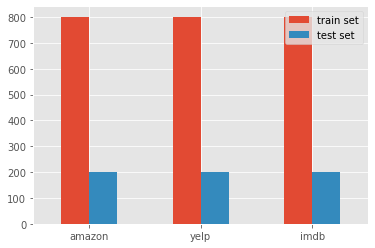

In [46]:
#plot multibargraph
df_bars_sentiment.transpose().plot.bar(rot=0)

---

#### Exercise 4

In [47]:
record_sentiment = sentiment_data.iloc[0].sentence

In [48]:
analyze(record_sentiment)

['can', 'wait', 'to', 'go', 'back']

---

#### Exercise 5

In [49]:
senti_counts = count_vect.fit_transform(sentiment_data.sentence)
senti_counts

<3000x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31578 stored elements in Compressed Sparse Row format>

In [50]:
list(sentiment_data.index)[::20][0:1000]

[0,
 20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500,
 520,
 540,
 560,
 580,
 600,
 620,
 640,
 660,
 680,
 700,
 720,
 740,
 760,
 780,
 800,
 820,
 840,
 860,
 880,
 900,
 920,
 940,
 960,
 980,
 1000,
 1020,
 1040,
 1060,
 1080,
 1100,
 1120,
 1140,
 1160,
 1180,
 1200,
 1220,
 1240,
 1260,
 1280,
 1300,
 1320,
 1340,
 1360,
 1380,
 1400,
 1420,
 1440,
 1460,
 1480,
 1500,
 1520,
 1540,
 1560,
 1580,
 1600,
 1620,
 1640,
 1660,
 1680,
 1700,
 1720,
 1740,
 1760,
 1780,
 1800,
 1820,
 1840,
 1860,
 1880,
 1900,
 1920,
 1940,
 1960,
 1980,
 2000,
 2020,
 2040,
 2060,
 2080,
 2100,
 2120,
 2140,
 2160,
 2180,
 2200,
 2220,
 2240,
 2260,
 2280,
 2300,
 2320,
 2340,
 2360,
 2380,
 2400,
 2420,
 2440,
 2460,
 2480,
 2500,
 2520,
 2540,
 2560,
 2580,
 2600,
 2620,
 2640,
 2660,
 2680,
 2700,
 2720,
 2740,
 2760,
 2780,
 2800,
 2820,
 2840,
 2860,
 2880,
 2900,
 2920,
 2940,
 2960,
 2980]

In [51]:
# plot_x_100 = ["term_"+str(i) for i in count_vect.get_feature_names()[::20][0:1000]]
# plot_y_100 = ["doc_"+ str(i) for i in list(X.index)[::20][0:1000]]
# plot_z_100 = X_counts[::20][0:1000, 0:len(plot_x_100)].toarray()

senti_x = ["term_"+str(i) for i in count_vect.get_feature_names()[::20][0:1000]]
senti_y = ["doc_"+ str(i) for i in list(sentiment_data.index)[::20][0:1000]]
senti_z = senti_counts[::20][0:1000, 0:len(senti_x)].toarray()

In [52]:
senti_y

['doc_0',
 'doc_20',
 'doc_40',
 'doc_60',
 'doc_80',
 'doc_100',
 'doc_120',
 'doc_140',
 'doc_160',
 'doc_180',
 'doc_200',
 'doc_220',
 'doc_240',
 'doc_260',
 'doc_280',
 'doc_300',
 'doc_320',
 'doc_340',
 'doc_360',
 'doc_380',
 'doc_400',
 'doc_420',
 'doc_440',
 'doc_460',
 'doc_480',
 'doc_500',
 'doc_520',
 'doc_540',
 'doc_560',
 'doc_580',
 'doc_600',
 'doc_620',
 'doc_640',
 'doc_660',
 'doc_680',
 'doc_700',
 'doc_720',
 'doc_740',
 'doc_760',
 'doc_780',
 'doc_800',
 'doc_820',
 'doc_840',
 'doc_860',
 'doc_880',
 'doc_900',
 'doc_920',
 'doc_940',
 'doc_960',
 'doc_980',
 'doc_1000',
 'doc_1020',
 'doc_1040',
 'doc_1060',
 'doc_1080',
 'doc_1100',
 'doc_1120',
 'doc_1140',
 'doc_1160',
 'doc_1180',
 'doc_1200',
 'doc_1220',
 'doc_1240',
 'doc_1260',
 'doc_1280',
 'doc_1300',
 'doc_1320',
 'doc_1340',
 'doc_1360',
 'doc_1380',
 'doc_1400',
 'doc_1420',
 'doc_1440',
 'doc_1460',
 'doc_1480',
 'doc_1500',
 'doc_1520',
 'doc_1540',
 'doc_1560',
 'doc_1580',
 'doc_1600',
 'd

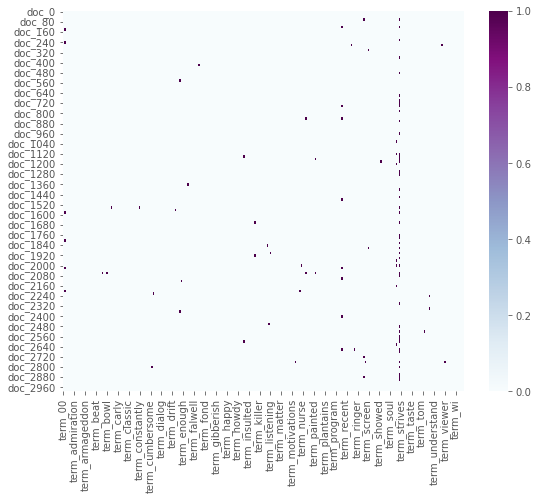

In [53]:
import seaborn as sns

df_sentiment = pd.DataFrame(senti_z, columns = senti_x, index = senti_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_sentiment,
                 cmap="BuPu",
                 vmin=0, vmax=1, annot=False)

---

#### Exercise 6

In [54]:
senti_reduced_3D = PCA(n_components = 3).fit_transform(senti_counts.toarray())

<IPython.core.display.Javascript object>


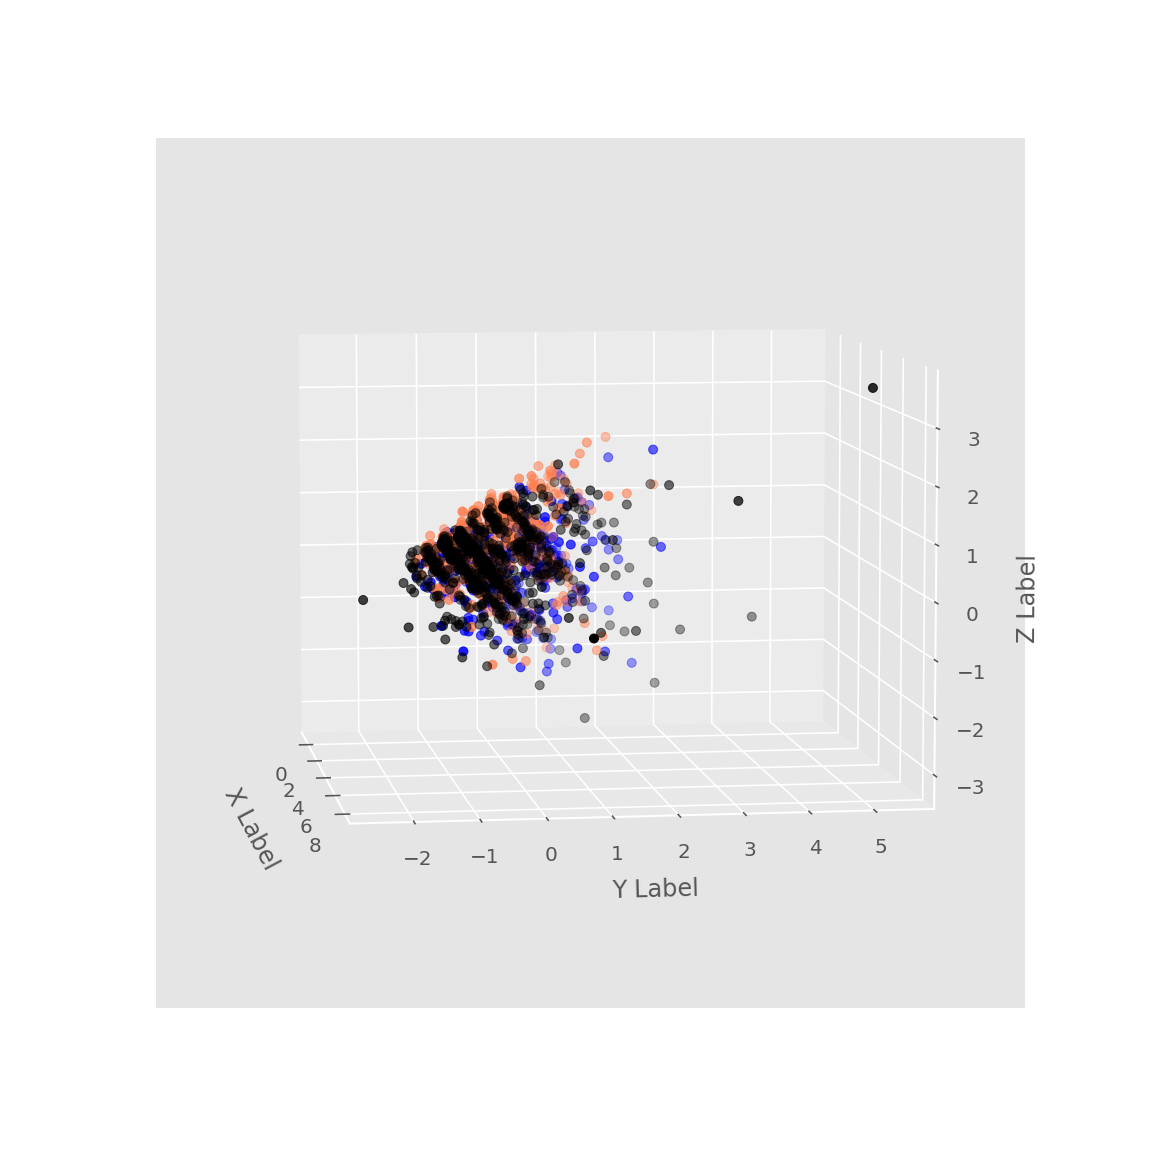

In [55]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, categories):
    xs_3D = senti_reduced_3D[sentiment_data['category_name'] == category].T[0]
    ys_3D = senti_reduced_3D[sentiment_data['category_name'] == category].T[1]
    zs_3D = senti_reduced_3D[sentiment_data['category_name'] == category].T[2]
   
    ax.scatter(xs_3D, ys_3D, zs_3D, c=c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

---

#### Exercise 6 Again

In [56]:
#### NO ANSWER

---

#### Exercise 7

In [57]:
senti_frequencies = np.asarray(senti_counts.sum(axis=0))[0]

In [58]:
xs_senti_temp = count_vect.get_feature_names()[::20][:1000]
ys_senti = senti_frequencies[::20][:1000]

In [59]:
xs_senti = np.array(xs_senti_temp)

In [60]:
df_senti_temp = pd.DataFrame([xs_senti, ys_senti])

In [61]:
df_senti = df_senti_temp.transpose()

In [62]:
df_senti.columns = ['term', 'frequency']

In [63]:
df_senti

term frequency
0            00         1
1          1986         1
2            3o         1
3           80s         1
4    absolutely        21
..          ...       ...
253      winner         2
254    wondered         1
255       worry         1
256       wrong        11
257     younger         1

[258 rows x 2 columns]

In [64]:
df_senti_final = df_senti.sort_values(by=['frequency'], ascending=False)

In [65]:
df_senti_final

term frequency
79       even        77
52      could        53
159      over        40
77     enough        36
181      real        33
..        ...       ...
114   idiotic         1
116  includes         1
118  insanely         1
121   ireland         1
257   younger         1

[258 rows x 2 columns]

<IPython.core.display.Javascript object>


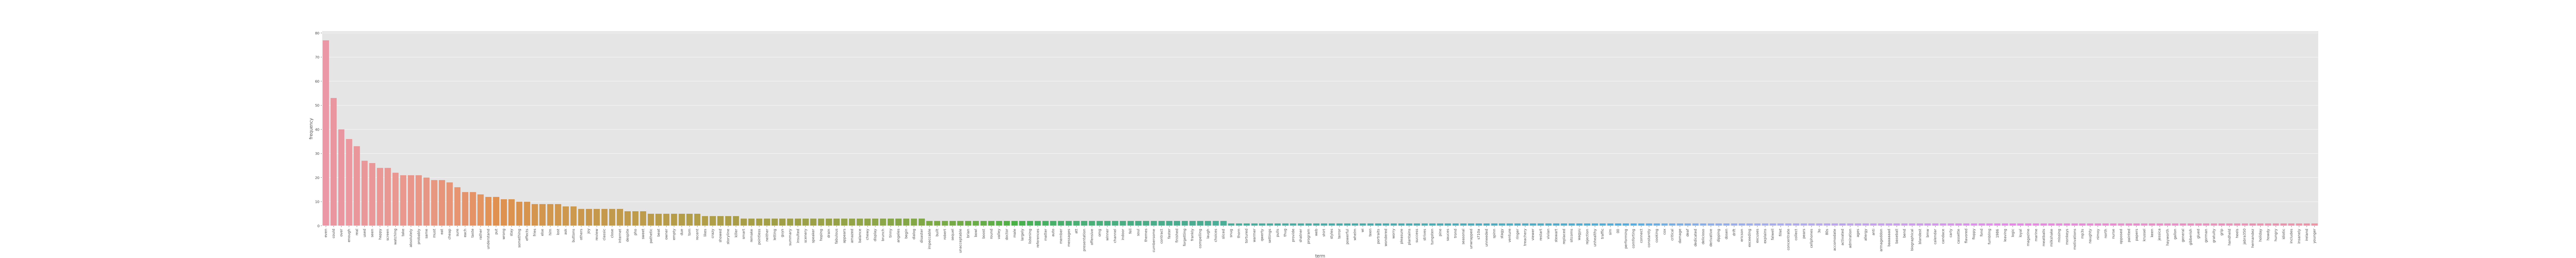

In [66]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=df_senti_final['term'], 
            y=df_senti_final['frequency'])
g.set_xticklabels(df_senti_final['term'], rotation = 90);

---

## Part 3

Generate meaningful new data visualizations. Refer to online resources and/or textbooks for inspiration and ideas.

Generate TF-IDF features from the tokens of each text. This will generat a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).

Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. 

Before I proceed to the visualization, I first extract the features using both TF-IDF and word frequency:

#### TFIDF features:

In [67]:
import sklearn

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
vectorizer = TfidfVectorizer()

tfidfv = vectorizer.fit_transform(sentiment_data['sentence'])

In [70]:
score_vec = np.array(sentiment_data['score'])

In [71]:
score_vec

array([1, 0, 0, ..., 0, 1, 0])

##### Training the Naive Bayes classsifier:

I used the Multinomial Naive Bayes classifier because of the nature of the features, which in this case are the TF-IDF and term-document frequency matrices. Both deal with values related to frequency which suits the use of the Multinomial NB. 

In [72]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(tfidfv, score_vec, test_size=0.25)

In [73]:
X_train

<2250x5155 sparse matrix of type '<class 'numpy.float64'>'
	with 23726 stored elements in Compressed Sparse Row format>

In [74]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB()

In [75]:
Y_pred = mnb.predict(X_test)

In [76]:
#calculate F1 score 
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='binary')

0.815114709851552

In [77]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       380
           1       0.81      0.82      0.82       370

    accuracy                           0.82       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.82      0.82      0.82       750



<IPython.core.display.Javascript object>


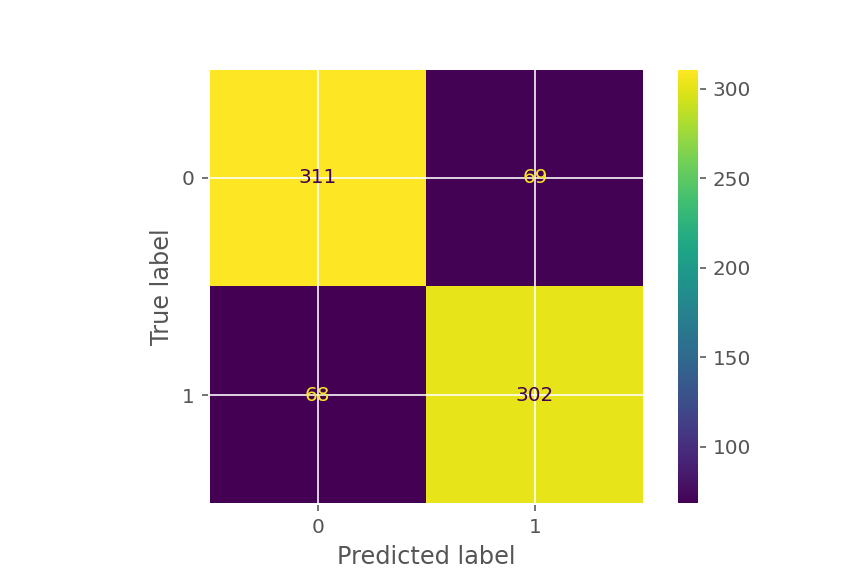

In [78]:
cm = metrics.confusion_matrix(Y_test, Y_pred, labels = [0, 1])
# Printing the precision and recall, among other metrics
print(metrics.classification_report(Y_test, Y_pred, labels = [0, 1]))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= mnb.classes_)
disp.plot()
plt.show()

#### Word Frequency features:

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
count_vectorizer = CountVectorizer()

word_freq = count_vectorizer.fit_transform(sentiment_data['sentence'])

In [81]:
word_freq

<3000x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31578 stored elements in Compressed Sparse Row format>

In [82]:
X_c_train, X_c_test, Y_c_train, Y_c_test = train_test_split(word_freq, score_vec, test_size=0.25)

In [83]:
mnb_c = MultinomialNB()
mnb.fit(X_c_train,Y_c_train)

MultinomialNB()

In [84]:
Y_c_pred = mnb.predict(X_c_test)

In [85]:
Y_c_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       381
           1       0.83      0.80      0.82       369

    accuracy                           0.82       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.82      0.82      0.82       750



<IPython.core.display.Javascript object>


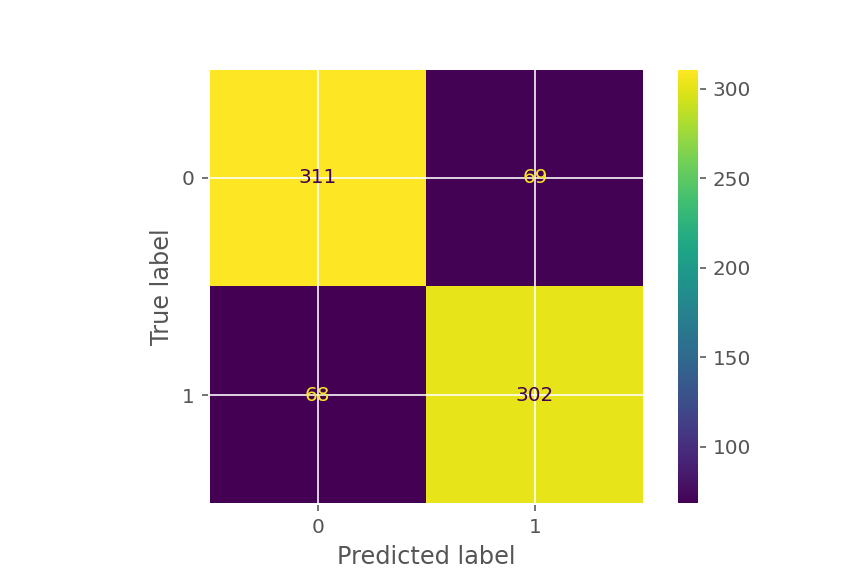

In [86]:
cm_c = metrics.confusion_matrix(Y_c_test, Y_c_pred, labels = [0, 1])
# Printing the precision and recall, among other metrics
print(metrics.classification_report(Y_c_test, Y_c_pred, labels = [0, 1]))

disp_c = ConfusionMatrixDisplay(confusion_matrix=cm_c, display_labels= mnb.classes_)
disp.plot()
plt.show()

##### Observation:

Using the same classifier type (Multinomial Naive Bayes) and the same size for the training and testing set, the classifer that used the TF-IDF matrix for features has a higher F1 score of ~0.82 compared to that of the term-document frequency with ~0.79. This suggests that the TF-IDF features are able to capture more information from the text data for the sentiment classification. 

#### Visualization:
I wanted to look into generating word clouds for each document (sentence) based on the TF-IDF values obtained previously. Word clouds visually emphasize words that have higher TF-IDF scores and can give some intution on the significance of certain words, and can be a precursor to topic modelling.

We use the feature matrices obtained in the preceeding steps as a basis for the generation of the word clouds. I also followed the following reference to generate the word clouds: https://towardsdatascience.com/how-to-make-word-clouds-in-python-that-dont-suck-86518cdcb61f

In [87]:
import wordcloud
from wordcloud import WordCloud

In [88]:
feature_names = vectorizer.get_feature_names()

In [89]:
feature_names

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

In [90]:
dense = tfidfv.todense()

In [91]:
denselist = dense.tolist()

df = pd.DataFrame(denselist, columns = feature_names)

In [92]:
df

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
0     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...   ...    ...  ...    ...   ...      ...     ...      ...  
2995  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2996  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2997  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2998  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2999  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[3000 rows x 5155 columns]

In [93]:
data = df.transpose()
data.columns = ["doc_"+ str(i) for i in list(sentiment_data.index)]

In [94]:
data

doc_0  doc_1  doc_2  doc_3  doc_4  doc_5  doc_6  doc_7  doc_8  doc_9  \
00         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
100        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
z500a      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zero       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zillion    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zombie     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zombiez    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         ...  doc_2990  doc_2991  doc_2992  doc_2993  doc_2994  doc_2995  \
00       ...       0.0       0.0       0.0       0.0       0.0       0.0   
10       ...       0.0       0.0       0.0       0.0       0.0       0.0   
100      ...       0.0       0.0       0.0       0.0       0.0       0.0   
11       ...       0.0       0.0       0.0       0.0       0.0       0.0   
12       ...       0.0       0.0       0.0       0.0       0.0       0.0   
...      ...       ...       ...       ...       ...       ...       ...   
z500a    ...       0.0       0.0       0.0       0.0       0.0       0.0   
zero     ...       0.0       0.0       0.0       0.0       0.0       0.0   
zillion  ...       0.0       0.0       0.0       0.0       0.0       0.0   
zombie   ...       0.0       0.0       0.0       0.0       0.0       0.0   
zombiez  ...       0.0       0.0       0.0       0.0       0.0       0.0   

         doc_2996  doc_2997  doc_2998  doc_2999  
00            0.0       0.0       0.0       0.0  
10            0.0       0.0       0.0       0.0  
100           0.0       0.0       0.0       0.0  
11            0.0       0.0       0.0       0.0  
12            0.0       0.0       0.0       0.0  
...           ...       ...       ...       ...  
z500a         0.0       0.0       0.0       0.0  
zero          0.0       0.0       0.0       0.0  
zillion       0.0       0.0       0.0       0.0  
zombie        0.0       0.0       0.0       0.0  
zombiez       0.0       0.0       0.0       0.0  

[5155 rows x 3000 columns]

In [95]:
# change the value to black
def black_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%, 1%)")
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000

<IPython.core.display.Javascript object>


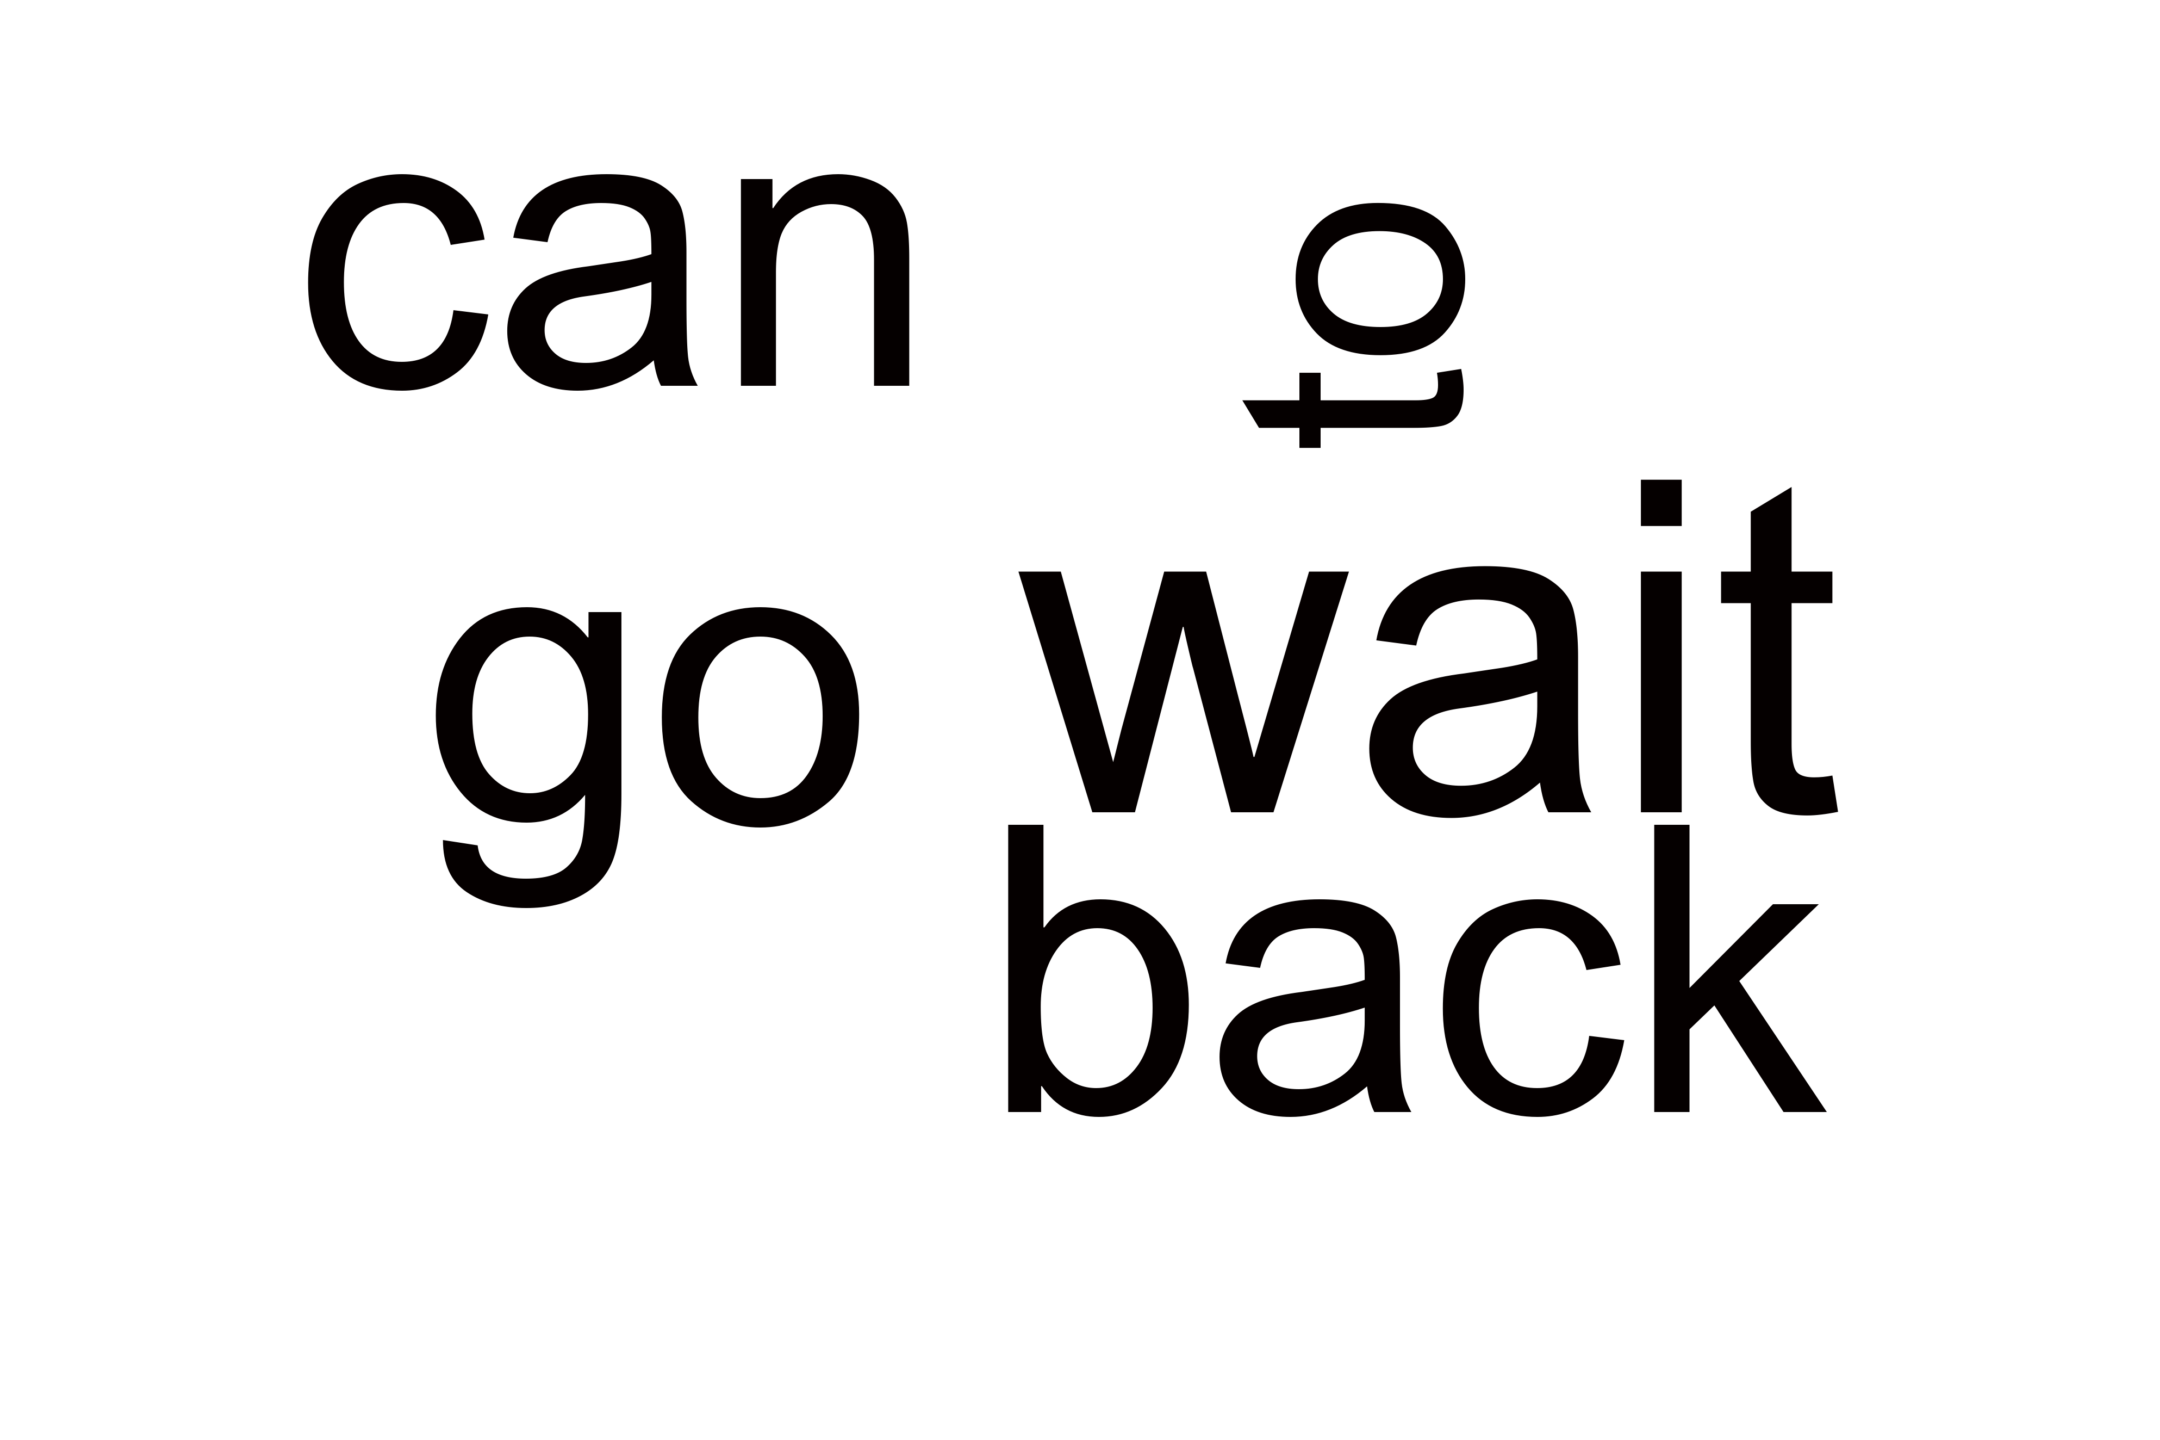

<IPython.core.display.Javascript object>


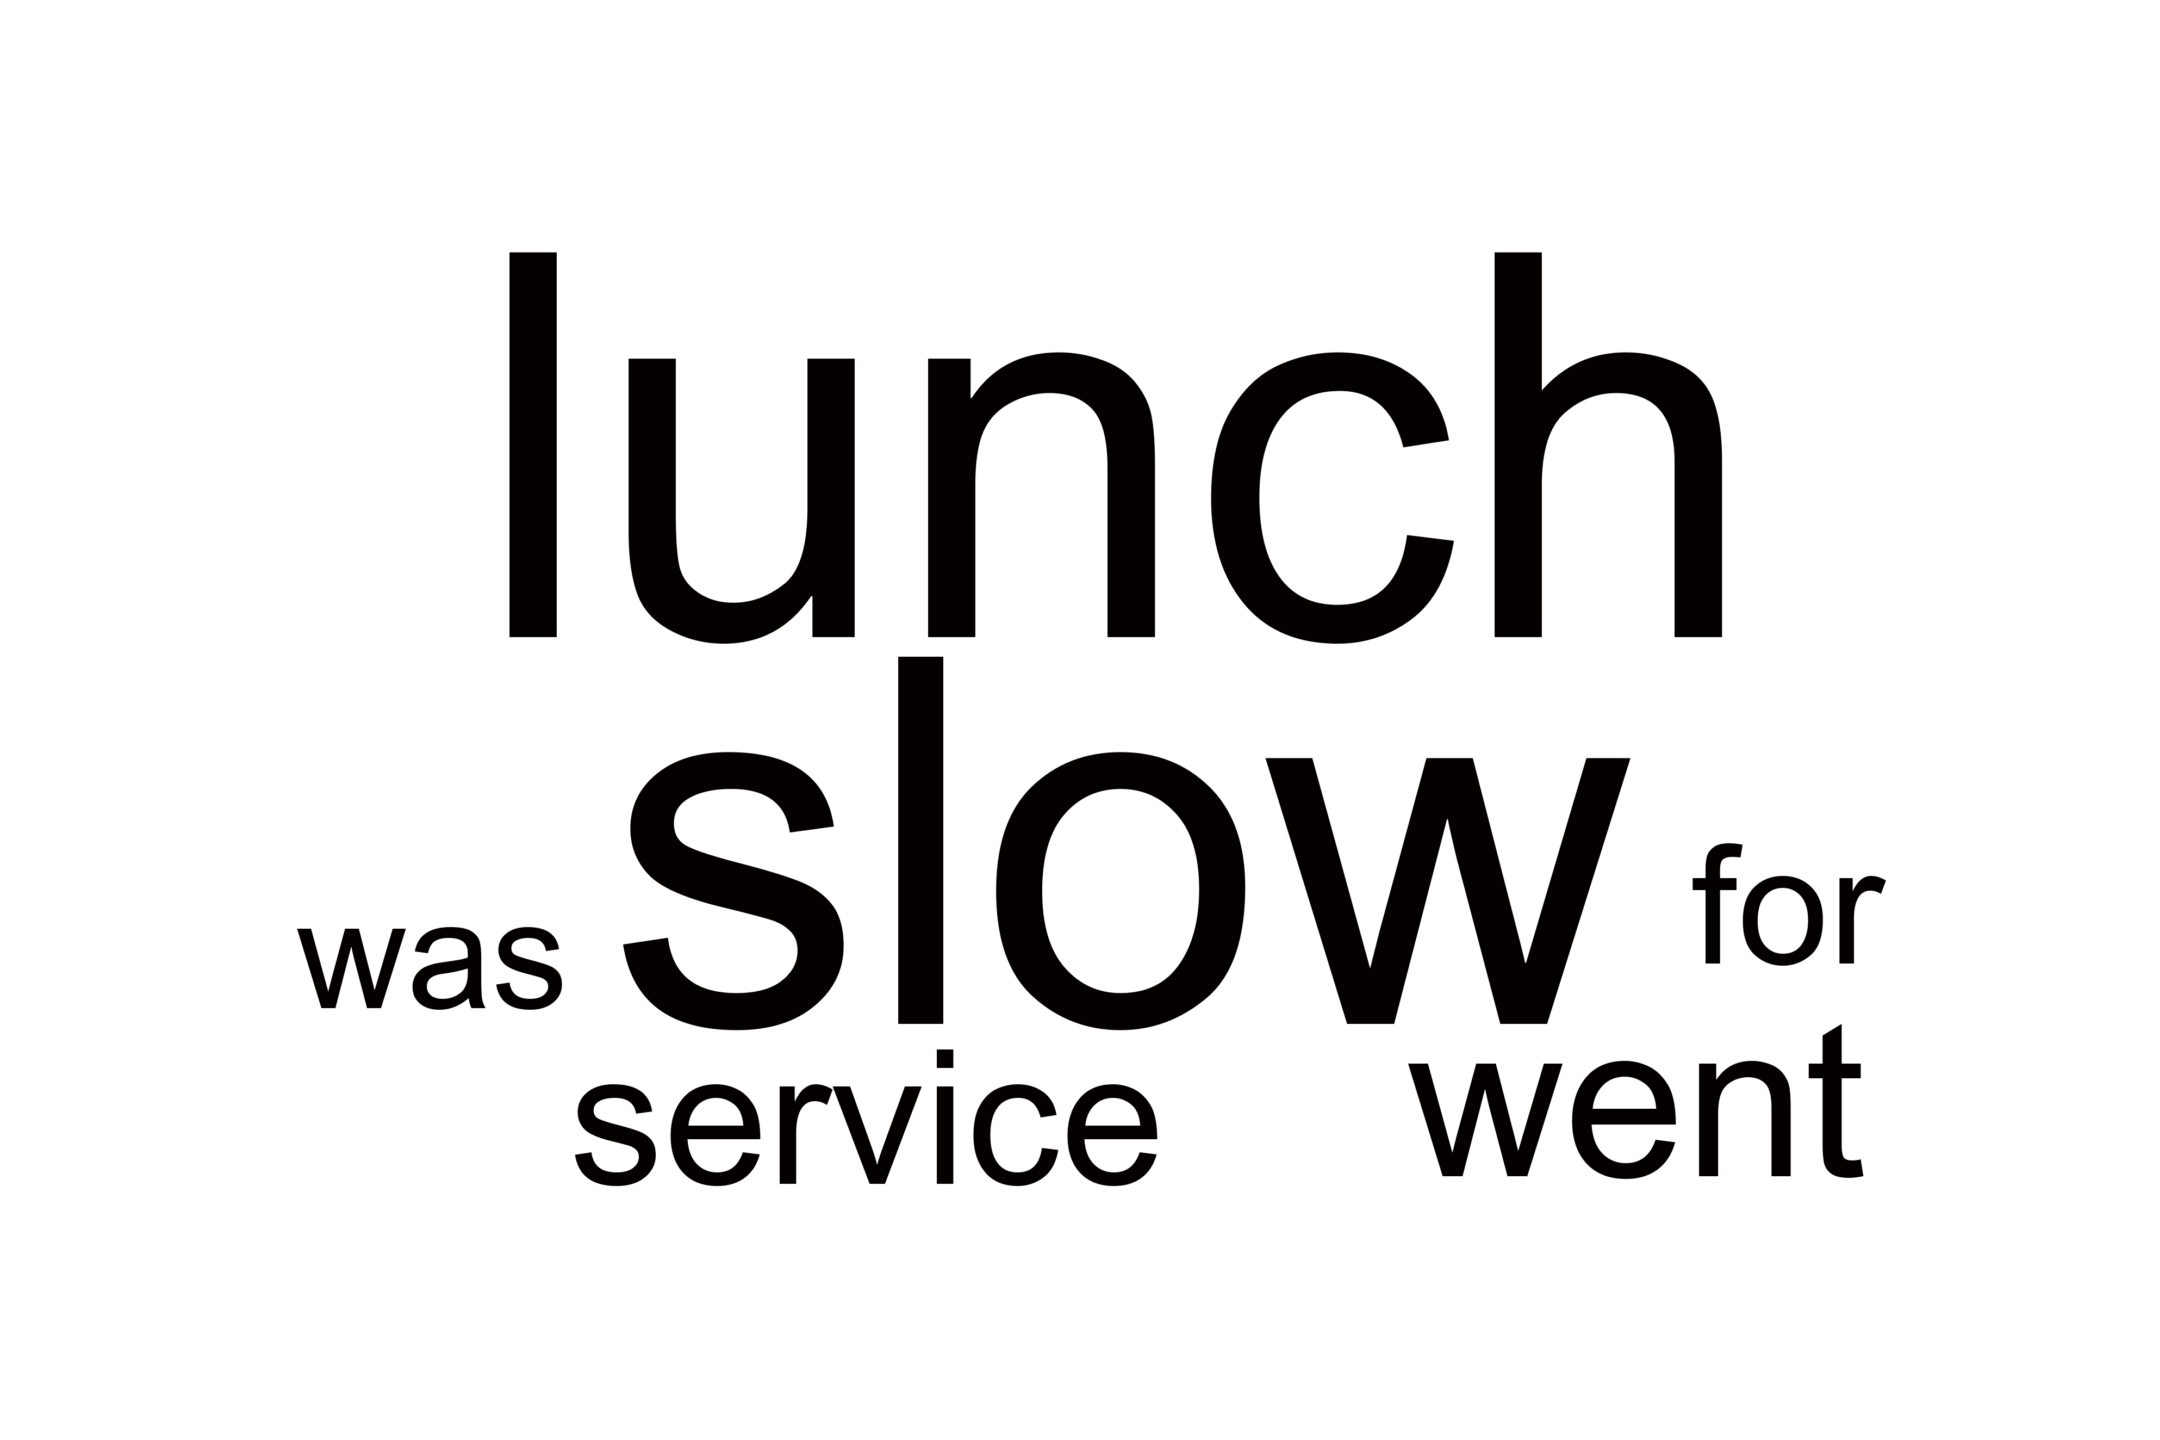

<IPython.core.display.Javascript object>


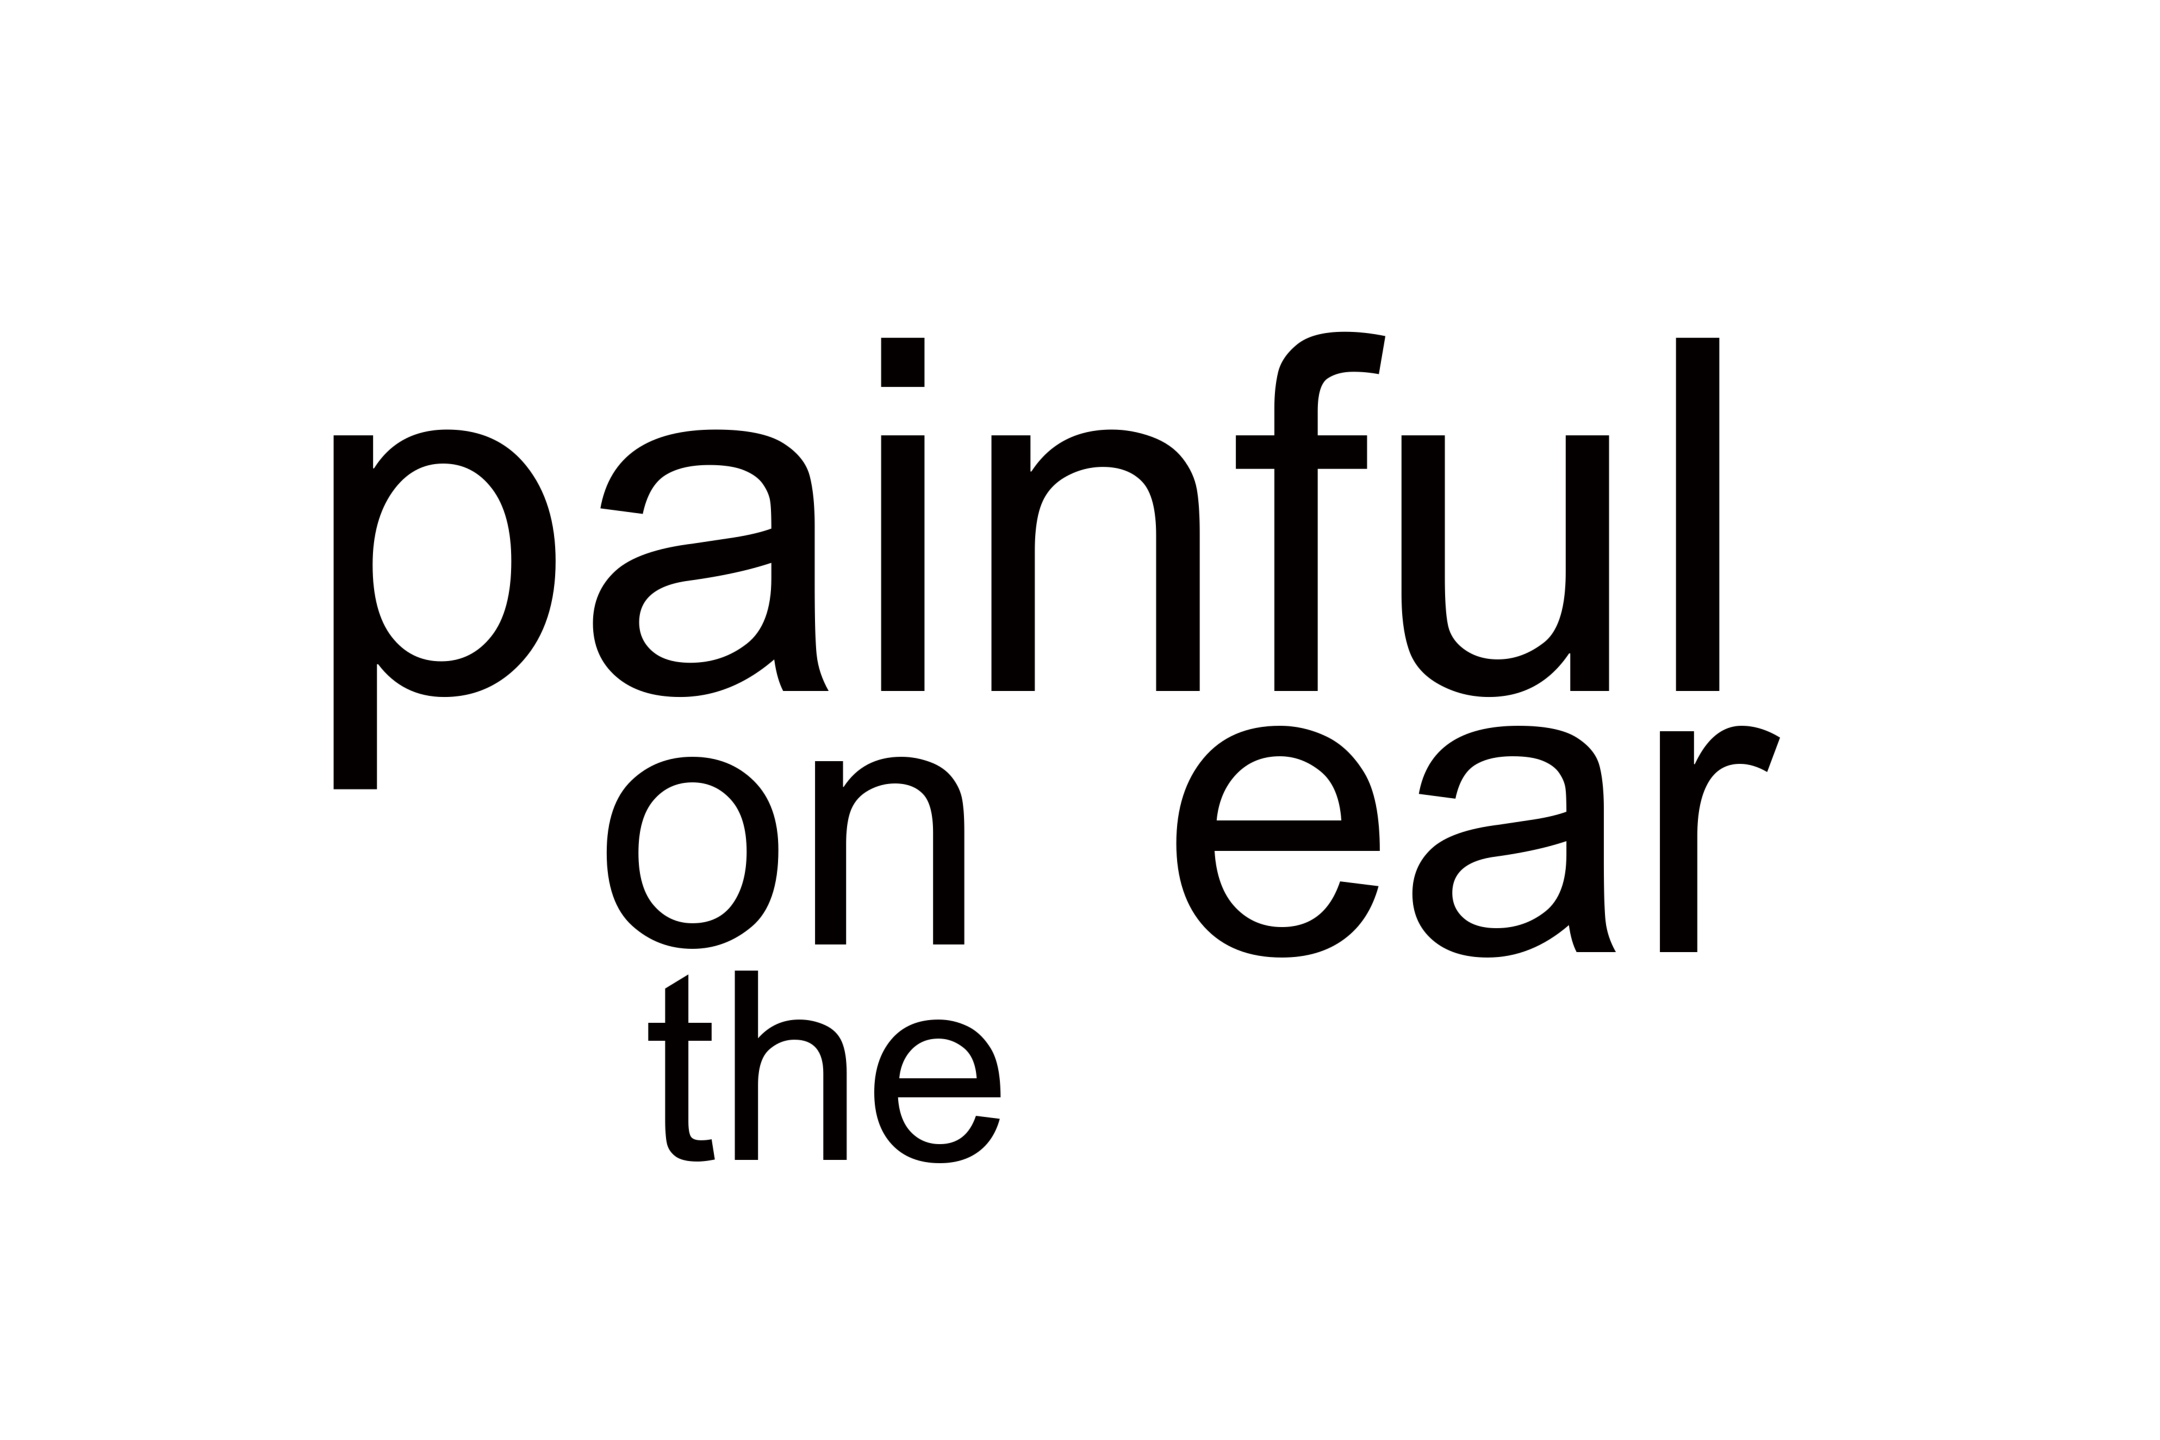

In [96]:
#generate word clouds for first 3 documents

for i in range(3):
    doc = data.columns
    wordcloud = WordCloud(font_path = '~/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(data[doc[i]])
    wordcloud.recolor(color_func = black_color_func)
    plt.figure(figsize=[15,10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

Trying the CountVectorizer as basis for the wordcloud:

In [97]:
feature_names_c = count_vectorizer.get_feature_names()

In [98]:
feature_names_c

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020',
 '510',
 '5320',
 '54',
 '5lb',
 '680',
 '70',
 '70000',
 '700w',
 '70s',
 '80',
 '80s',
 '8125',
 '85',
 '8525',
 '8530',
 '8pm',
 '90',
 '95',
 '99',
 'aailiyah',
 'abandoned',
 'abhor',
 'ability',
 'able',
 'abound',
 'about',
 'above',
 'abroad',
 'absolute',
 'absolutel',
 'absolutely',
 'absolutley',
 'abstruse',
 'abysmal',
 'ac',
 'academy',
 'accents',
 'accept',
 'acceptable',
 'access',
 'accessable',
 'accessible',
 'accessing',
 'accessory',
 'accessoryone',
 'accident',
 'accidentally',
 'acclaimed',
 'accolades',
 'accommodations',
 'accomodate',
 'accompanied',
 'according',

In [99]:
dense_c = word_freq.todense()

In [100]:
denselist_c = dense_c.tolist()

df_c= pd.DataFrame(denselist_c, columns = feature_names_c)

In [101]:
df_c

00  10  100  11  12  13  15  15g  15pm  17  ...  yucky  yukon  yum  \
0      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
1      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
3      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
4      0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
...   ..  ..  ...  ..  ..  ..  ..  ...   ...  ..  ...    ...    ...  ...   
2995   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2996   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2997   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2998   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   
2999   0   0    0   0   0   0   0    0     0   0  ...      0      0    0   

      yummy  yun  z500a  zero  zillion  zombie  zombiez  
0         0    0      0     0        0       0        0  
1         0    0      0     0        0       0        0  
2         0    0      0     0        0       0        0  
3         0    0      0     0        0       0        0  
4         0    0      0     0        0       0        0  
...     ...  ...    ...   ...      ...     ...      ...  
2995      0    0      0     0        0       0        0  
2996      0    0      0     0        0       0        0  
2997      0    0      0     0        0       0        0  
2998      0    0      0     0        0       0        0  
2999      0    0      0     0        0       0        0  

[3000 rows x 5155 columns]

In [102]:
data_c = df.transpose()
data_c.columns = ["doc_"+ str(i) for i in list(sentiment_data.index)]

In [103]:
data_c

doc_0  doc_1  doc_2  doc_3  doc_4  doc_5  doc_6  doc_7  doc_8  doc_9  \
00         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
10         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
100        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
11         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
z500a      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zero       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zillion    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zombie     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
zombiez    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

         ...  doc_2990  doc_2991  doc_2992  doc_2993  doc_2994  doc_2995  \
00       ...       0.0       0.0       0.0       0.0       0.0       0.0   
10       ...       0.0       0.0       0.0       0.0       0.0       0.0   
100      ...       0.0       0.0       0.0       0.0       0.0       0.0   
11       ...       0.0       0.0       0.0       0.0       0.0       0.0   
12       ...       0.0       0.0       0.0       0.0       0.0       0.0   
...      ...       ...       ...       ...       ...       ...       ...   
z500a    ...       0.0       0.0       0.0       0.0       0.0       0.0   
zero     ...       0.0       0.0       0.0       0.0       0.0       0.0   
zillion  ...       0.0       0.0       0.0       0.0       0.0       0.0   
zombie   ...       0.0       0.0       0.0       0.0       0.0       0.0   
zombiez  ...       0.0       0.0       0.0       0.0       0.0       0.0   

         doc_2996  doc_2997  doc_2998  doc_2999  
00            0.0       0.0       0.0       0.0  
10            0.0       0.0       0.0       0.0  
100           0.0       0.0       0.0       0.0  
11            0.0       0.0       0.0       0.0  
12            0.0       0.0       0.0       0.0  
...           ...       ...       ...       ...  
z500a         0.0       0.0       0.0       0.0  
zero          0.0       0.0       0.0       0.0  
zillion       0.0       0.0       0.0       0.0  
zombie        0.0       0.0       0.0       0.0  
zombiez       0.0       0.0       0.0       0.0  

[5155 rows x 3000 columns]

In [104]:
wordcloud_c = WordCloud().generate_from_frequencies(data_c['doc_0'])
plt.imshow(wordcloud)

<IPython.core.display.Javascript object>


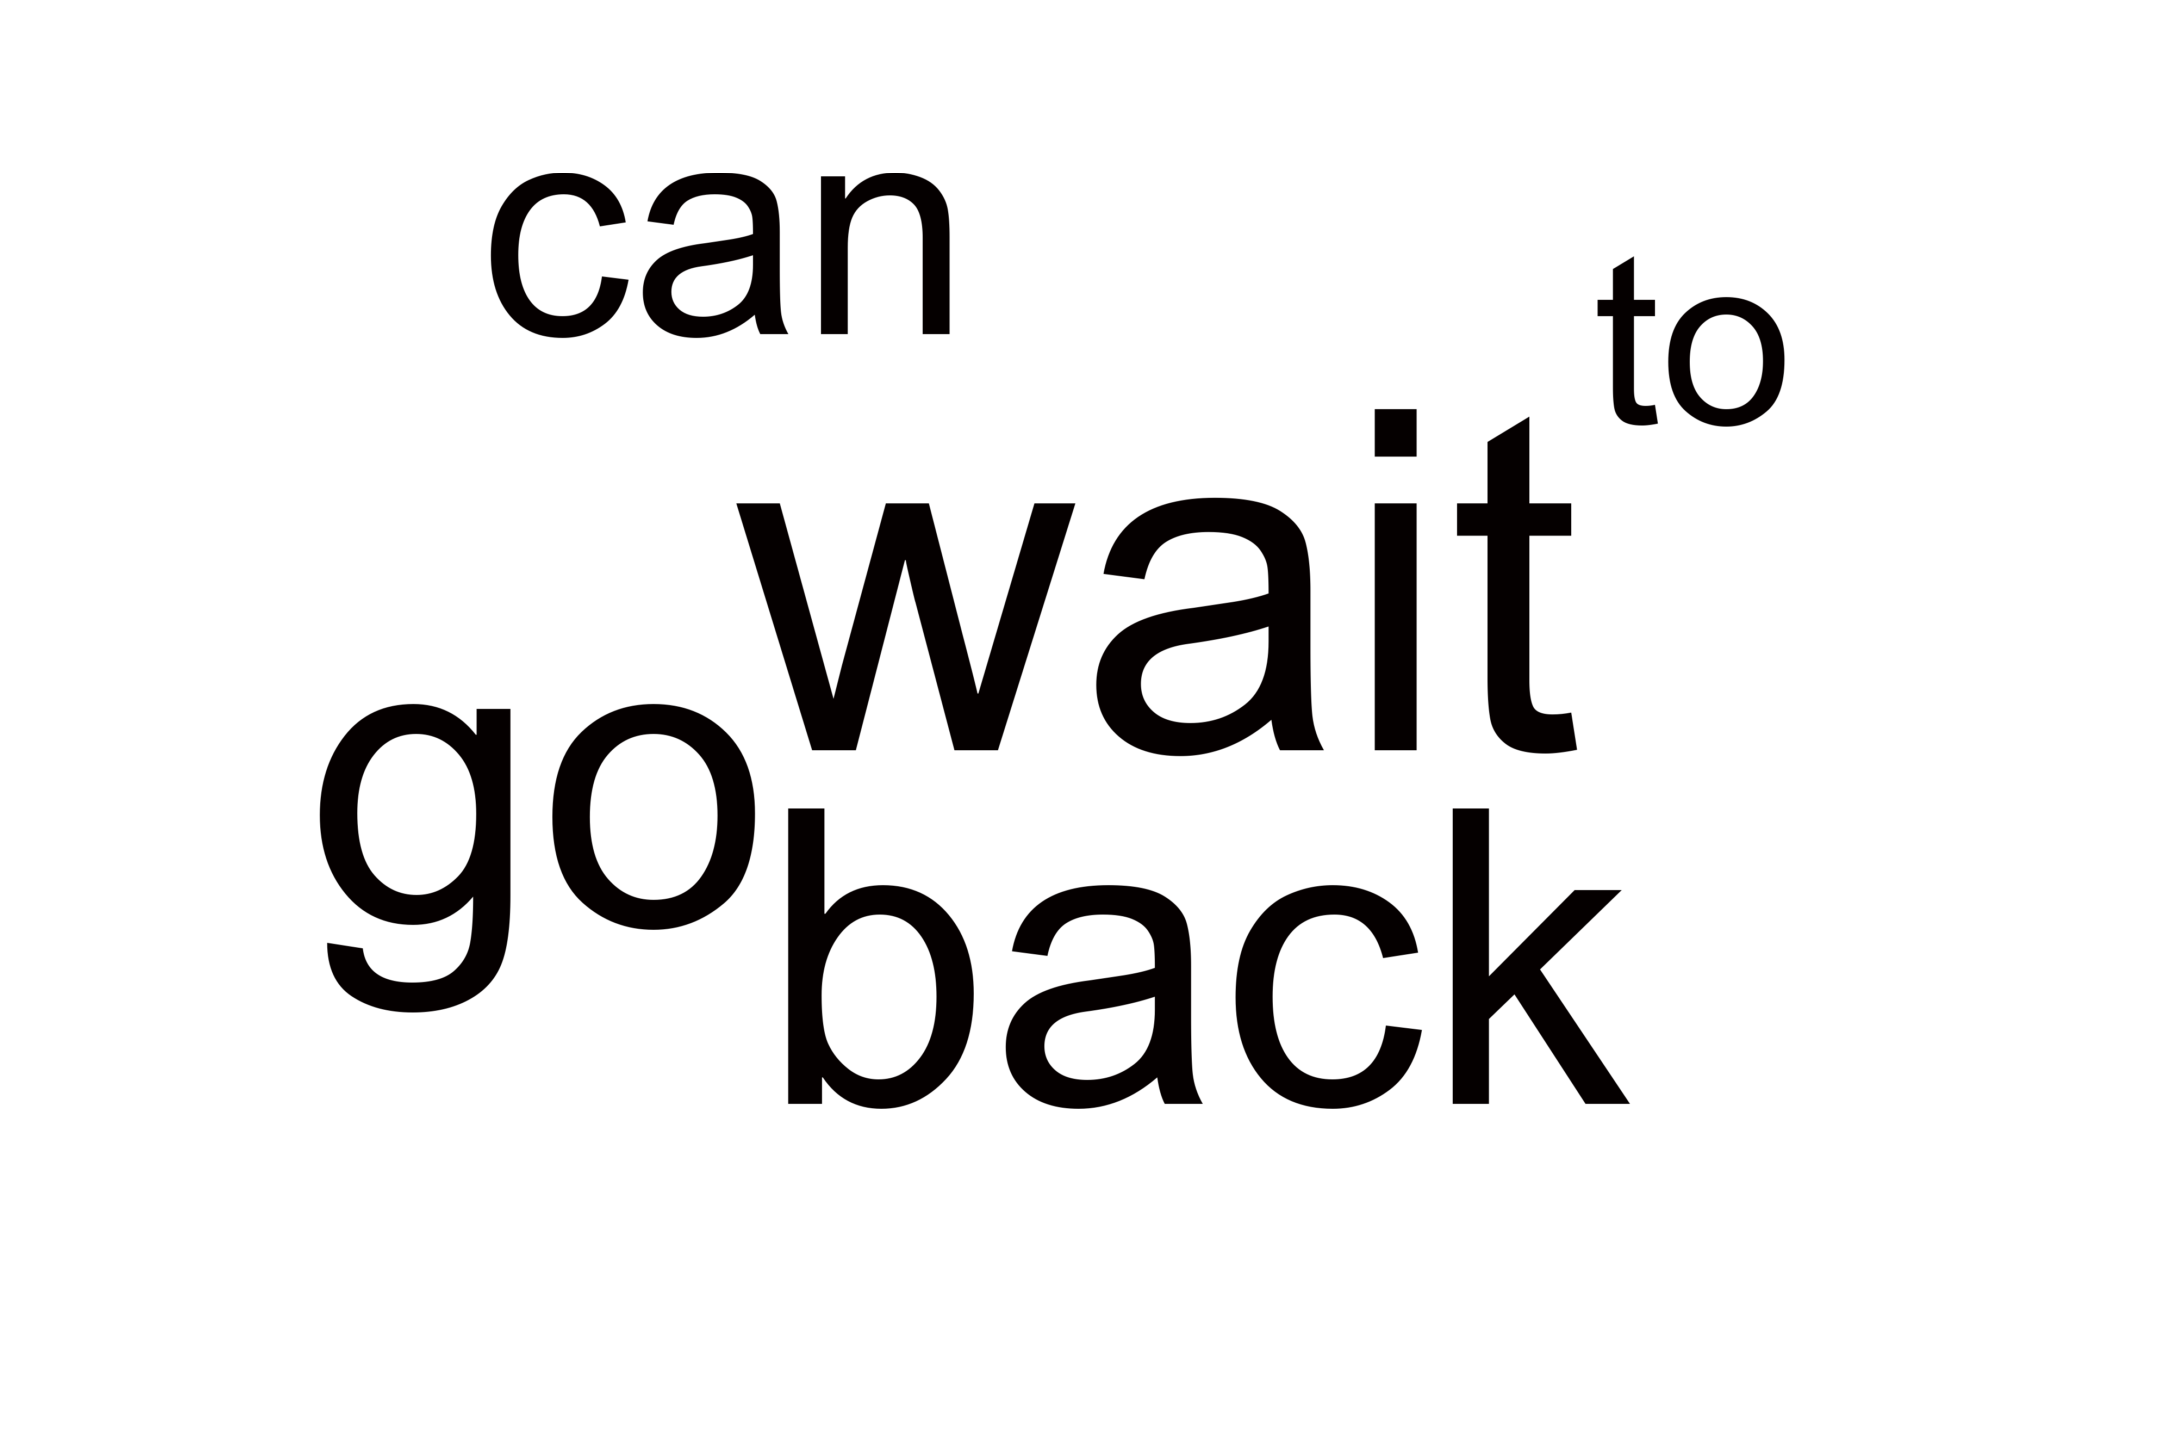

<IPython.core.display.Javascript object>


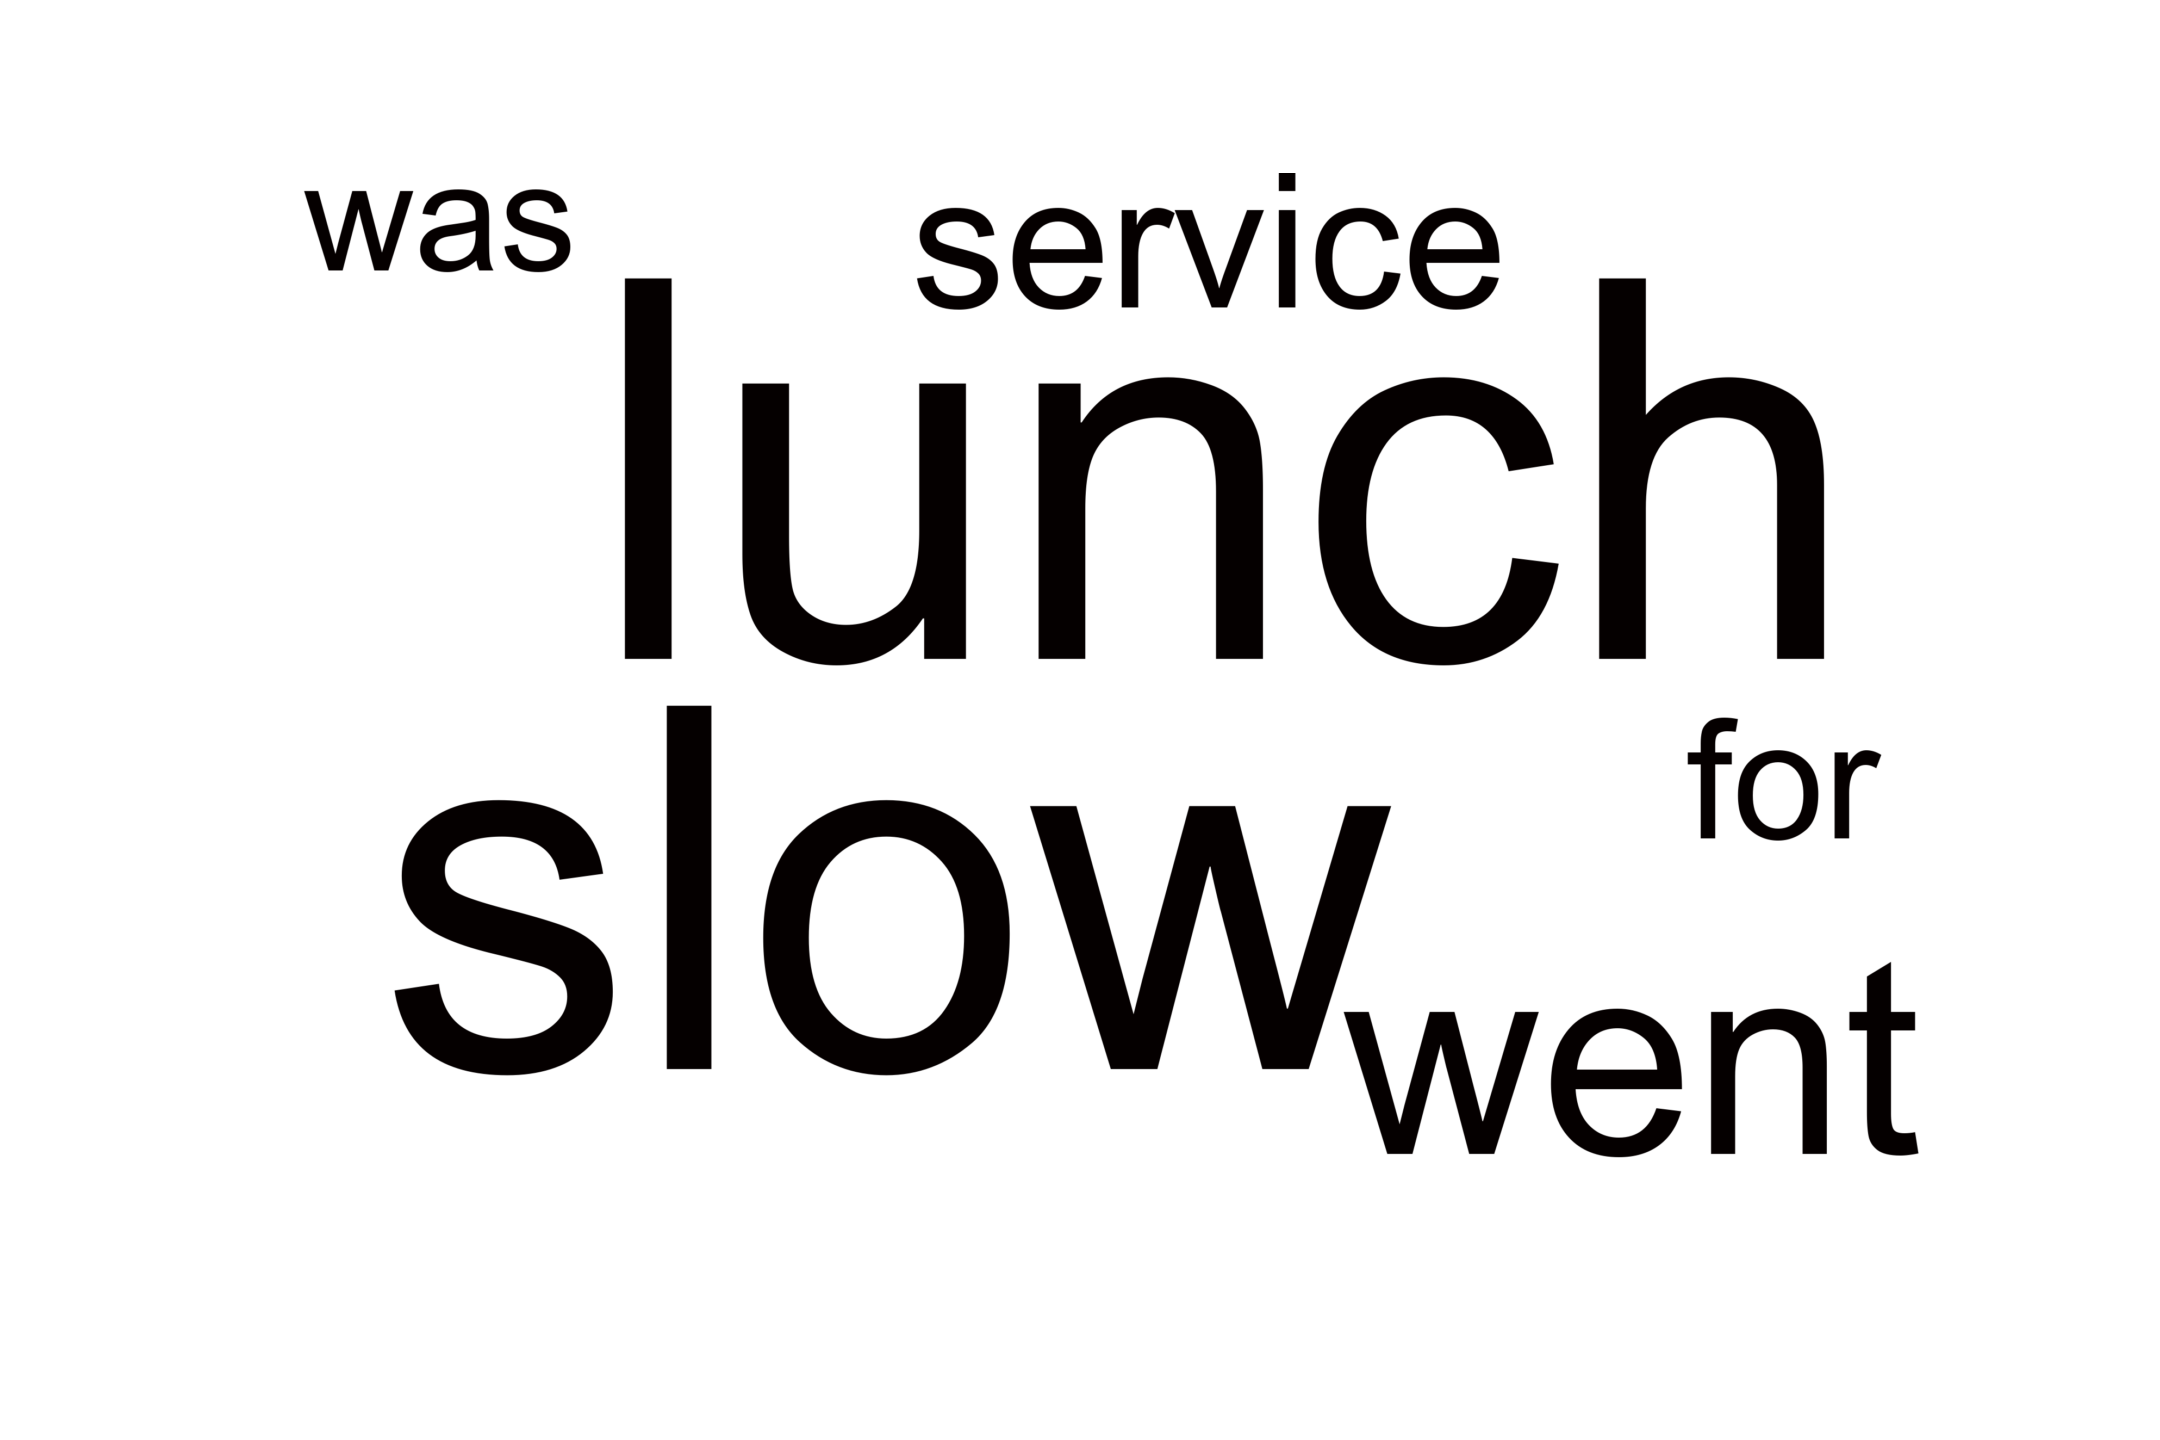

<IPython.core.display.Javascript object>


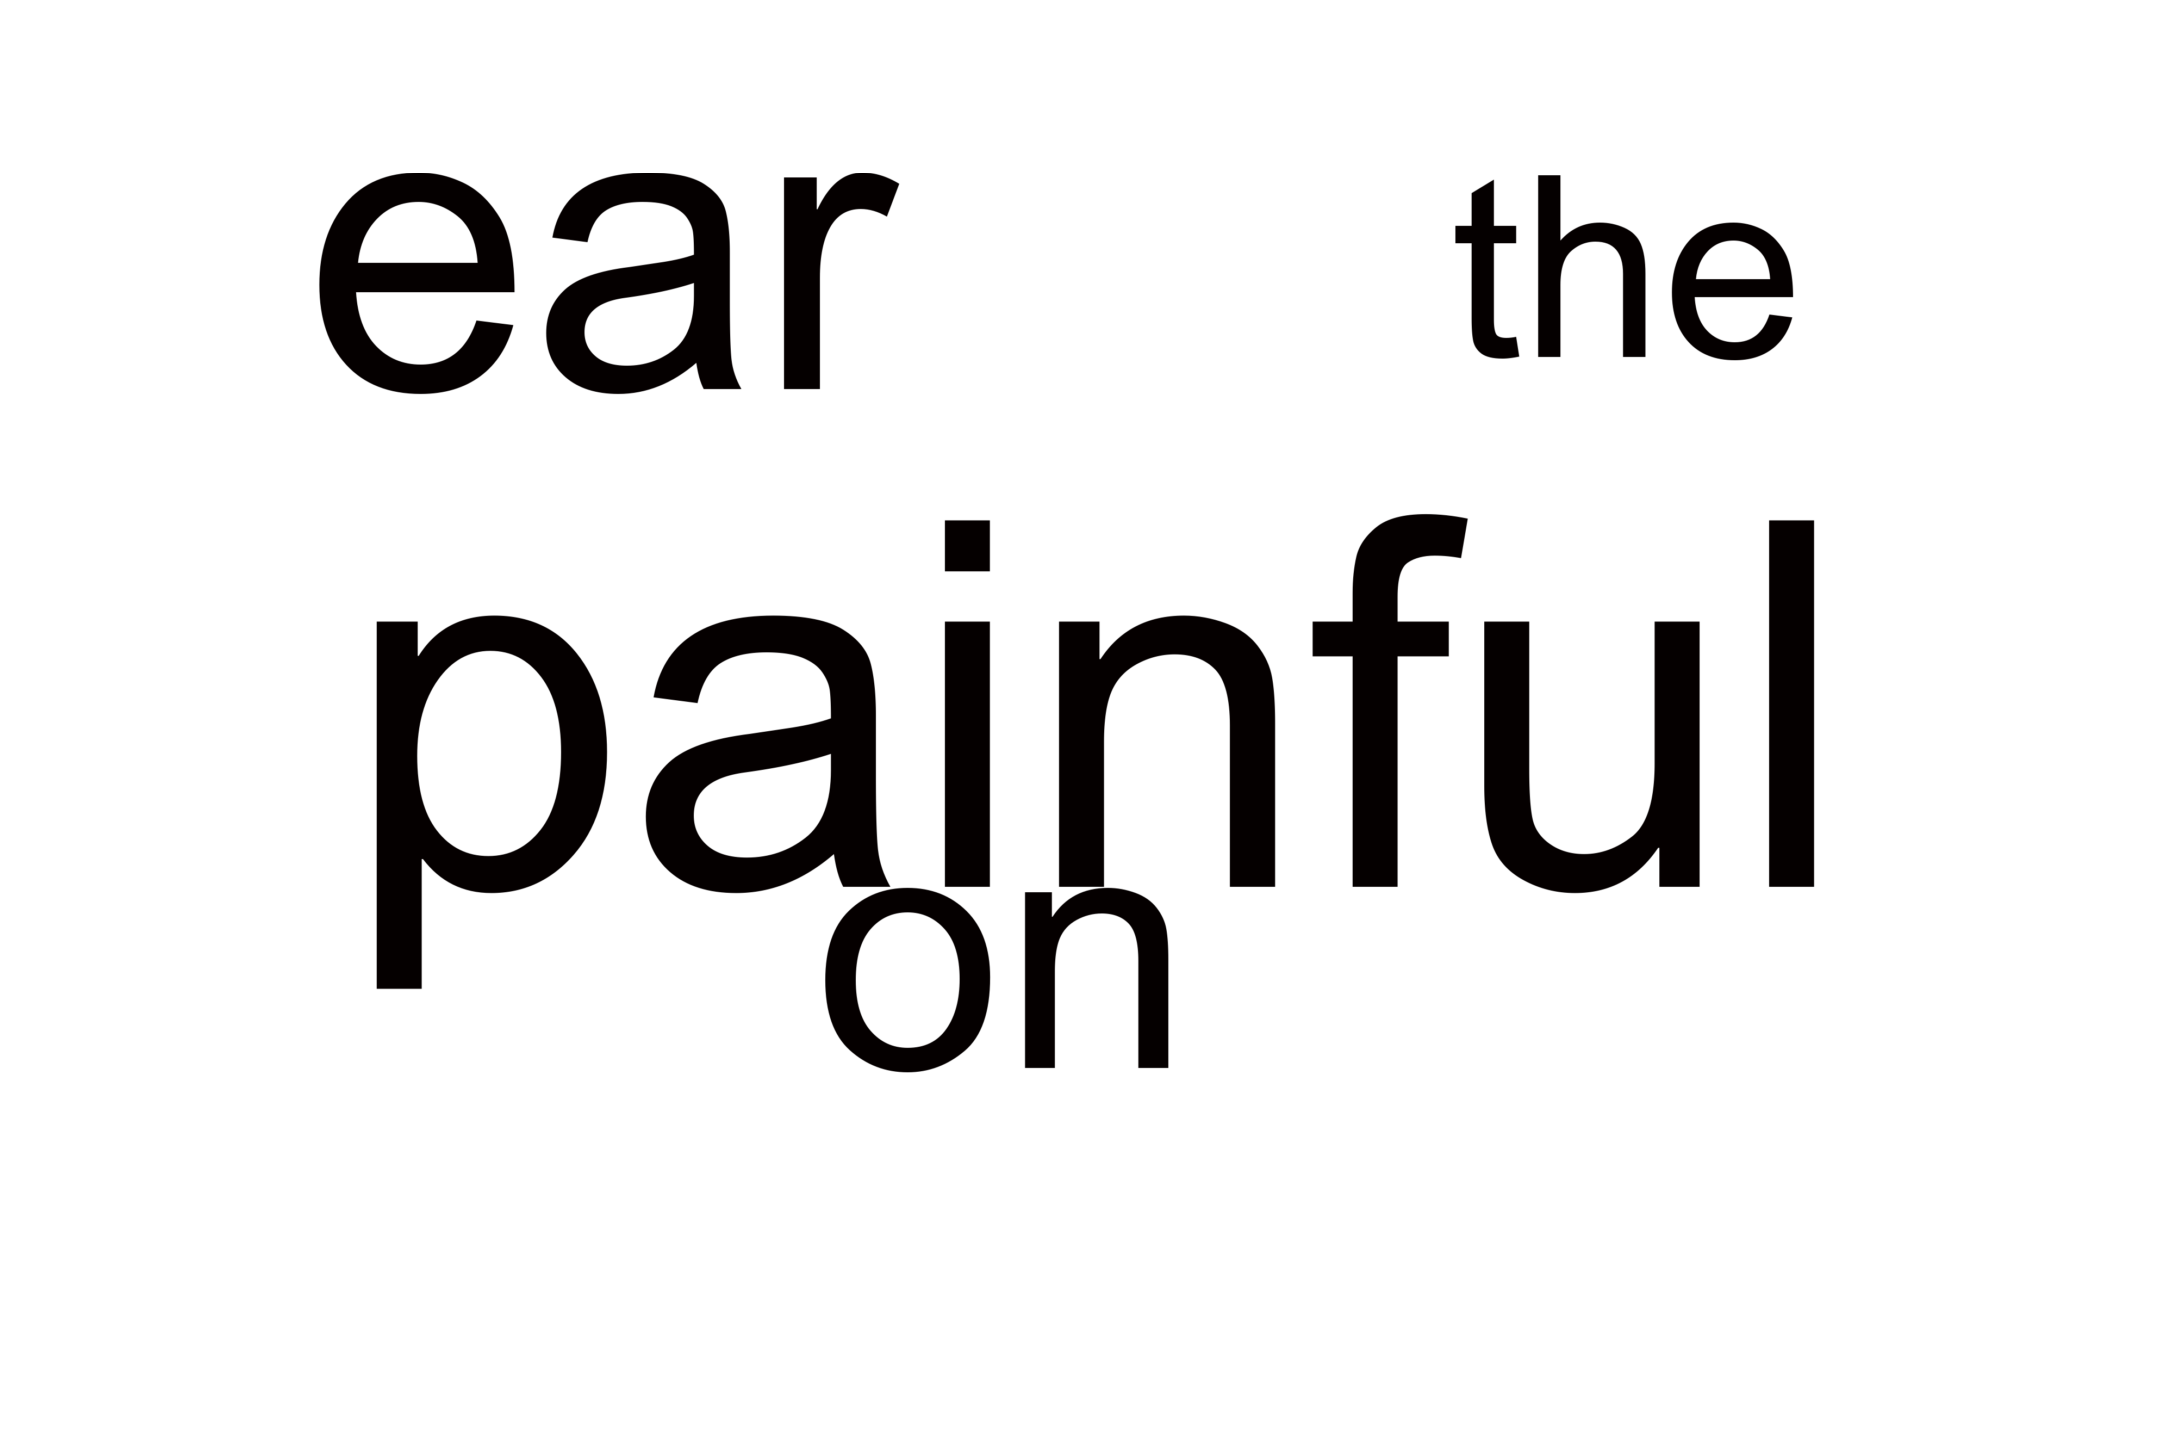

In [105]:
#generate word clouds for first 3 documents

for i in range(3):
    doc = data.columns
    wordcloud = WordCloud(font_path = '~/Library/Fonts/Arial Unicode.ttf', background_color="white", width=3000, height=2000, max_words=500).generate_from_frequencies(data_c[doc[i]])
    wordcloud.recolor(color_func = black_color_func)
    plt.figure(figsize=[15,10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")